# Spotify Top 100 Songs 2018

**By:** Jonathan Murthy

**Data:** The 100 most played songs from 2018 by the music streaming platform Spotify. Each song includes names, artists, Spotify ID, and audio features derived from the Spotify Web API. The audio features are derived from a propriety algorithm similar to the Music Genome Project which meaures aspects of a song on a scale of 0.0 to 1.0.   
https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018#top2018.csv

**keywords:** Spotify, audio features, music, bivariate analysis, statistics, music genome

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('top2018.csv')
df = df.drop(['id'], axis=1)

In [3]:
df.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


# Exploratory Data Analysis

In [4]:
# Function that takes a column name, counts the number of occurences each unique value has, and creates a bar chart. 
def analysis(column_name):
    x = df.groupby(column_name)['name'].count().sort_values(ascending=False)
    x.plot(kind='bar', figsize=(25,15))
    plt.ylabel('songs')
    plt.title(column_name)
    plt.show()
    
    x.hist(figsize=(20,10))
    plt.show()
    
    return x.head(20)

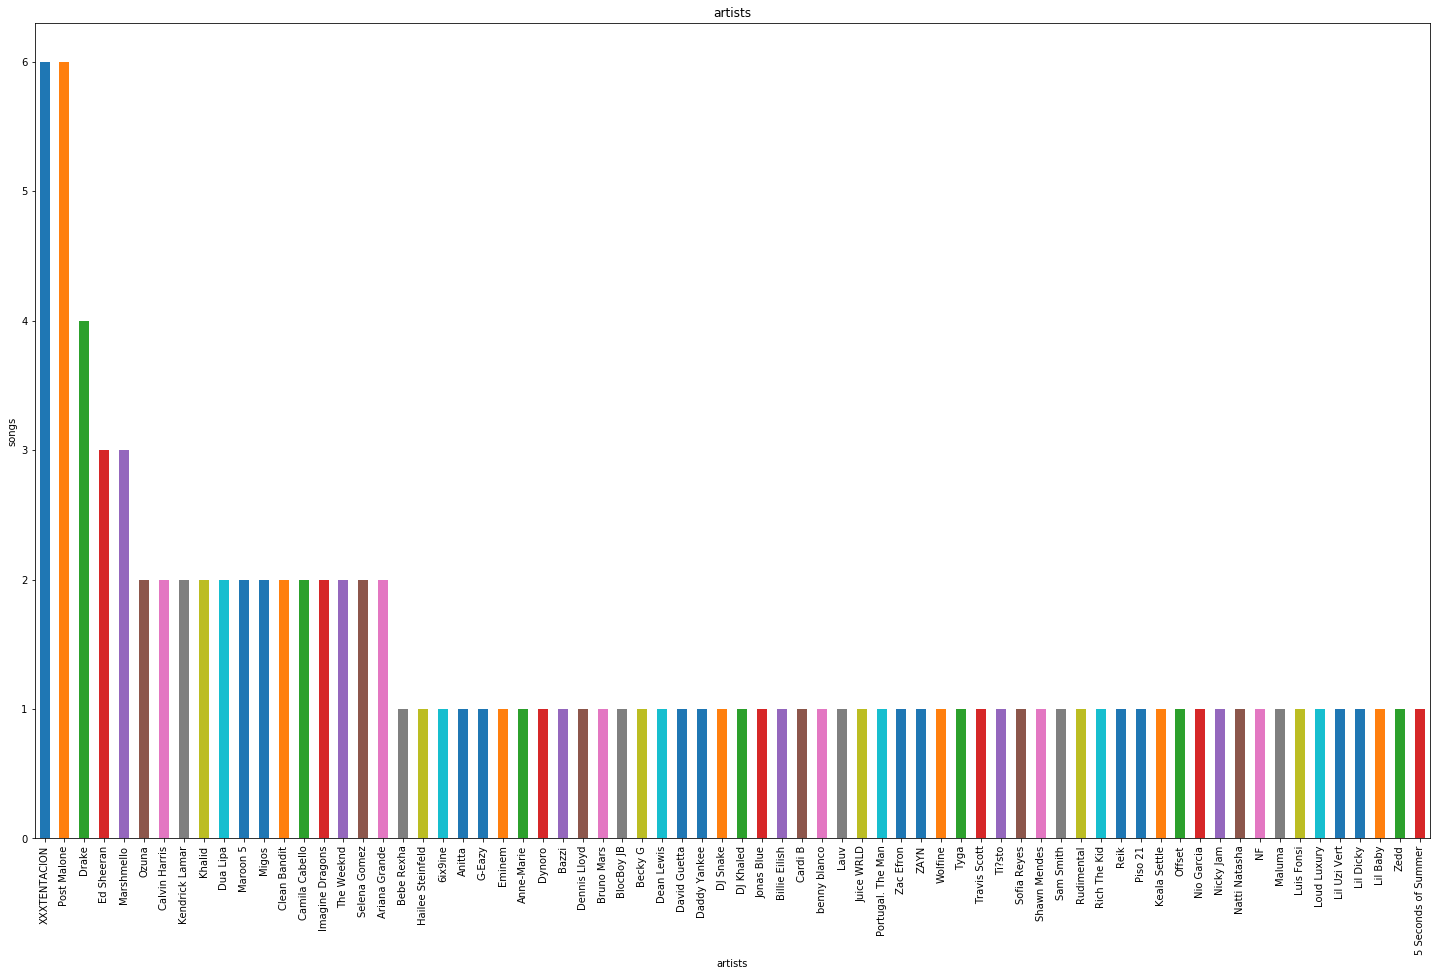

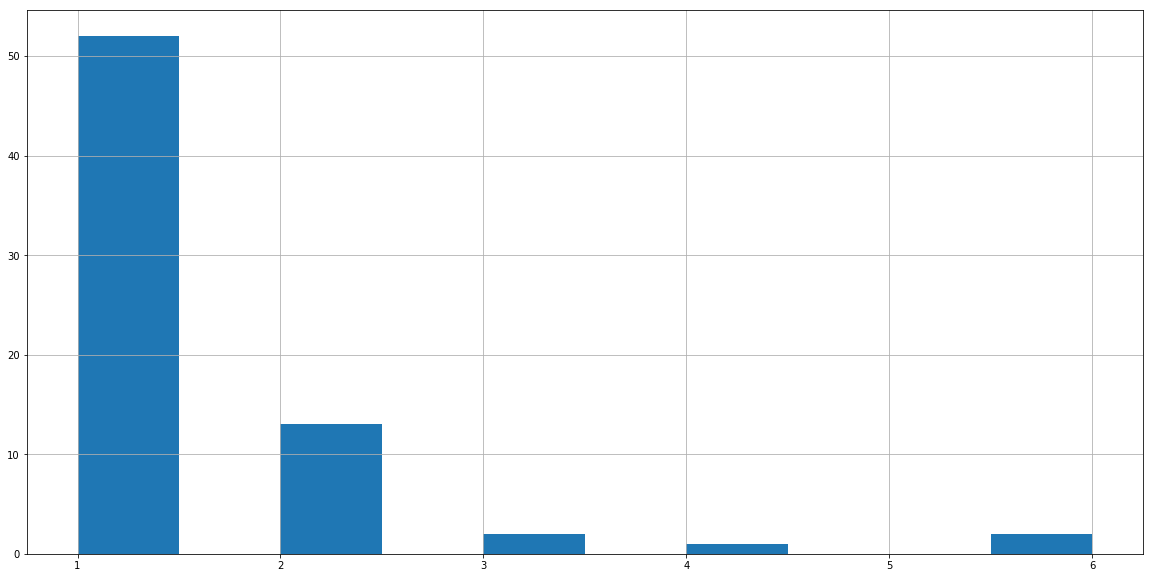

artists
XXXTENTACION        6
Post Malone         6
Drake               4
Ed Sheeran          3
Marshmello          3
Ozuna               2
Calvin Harris       2
Kendrick Lamar      2
Khalid              2
Dua Lipa            2
Maroon 5            2
Migos               2
Clean Bandit        2
Camila Cabello      2
Imagine Dragons     2
The Weeknd          2
Selena Gomez        2
Ariana Grande       2
Bebe Rexha          1
Hailee Steinfeld    1
Name: name, dtype: int64

In [5]:
analysis('artists')

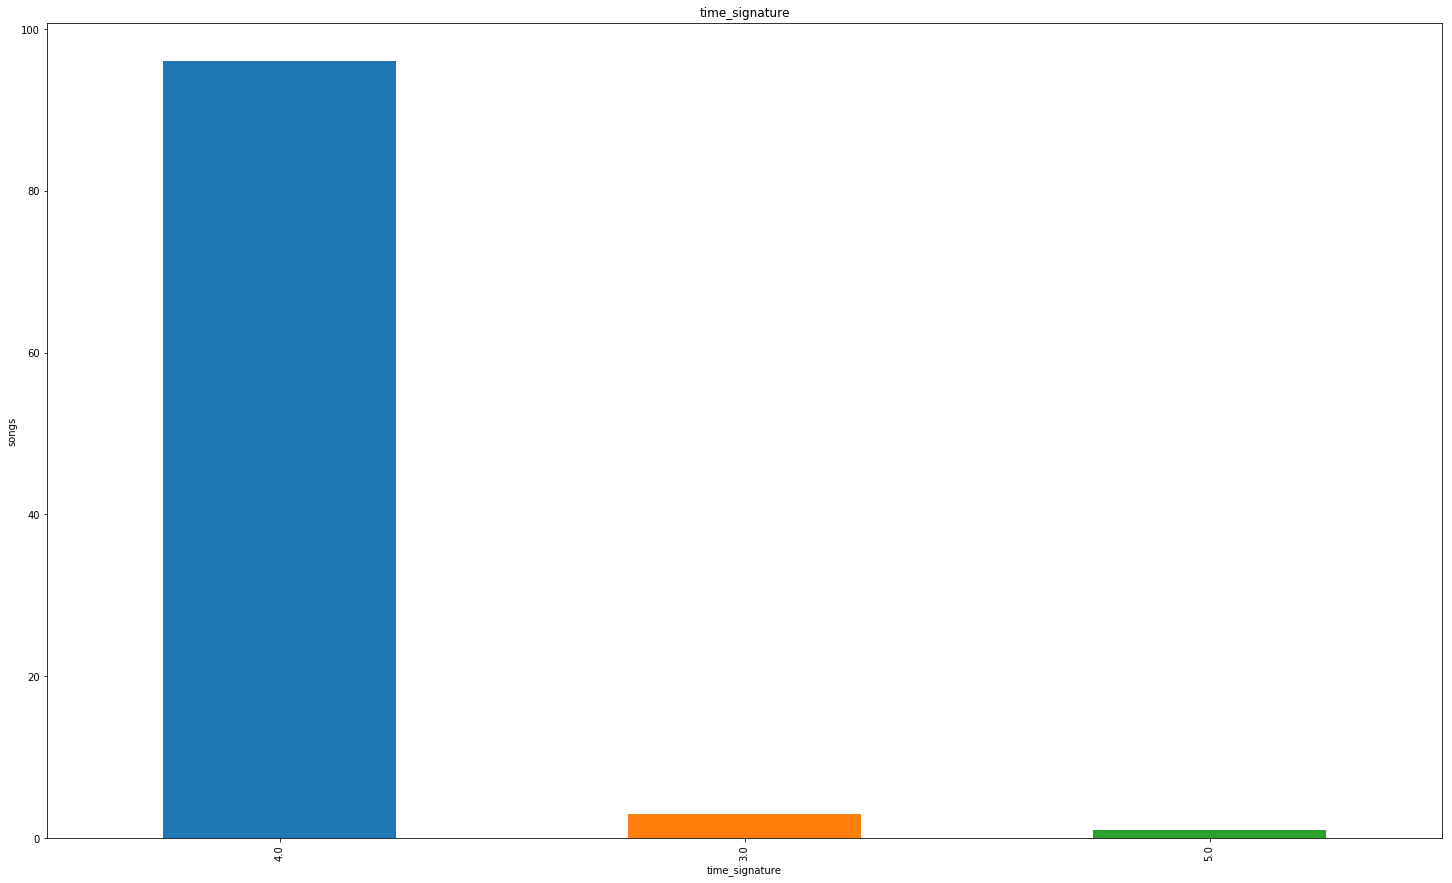

time_signature
4.0    96
3.0     3
5.0     1
Name: name, dtype: int64

In [6]:
x = df.groupby('time_signature')['name'].count().sort_values(ascending=False)
x.plot(kind='bar', figsize=(25,15))
plt.ylabel('songs')
plt.title('time_signature')
plt.show()

x

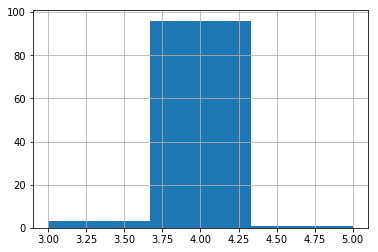

In [7]:
x = df['time_signature']
x.hist(bins=3)
plt.show()

In [8]:
# This function runs a .describe() method on each audio feature and returns the basic 
# statistics and the song and artist associated with the min and max value.

def stats(column_name):
    print()
    print(column_name)
    print(df[column_name].describe())
    print()
    max_val = df[df[column_name] == max(df[column_name])]
    min_val = df[df[column_name] == min(df[column_name])]
    
    print('max:', max_val[['name', 'artists']])
    print()
    print('min:', min_val[['name', 'artists']])
    return 

**danceability:** *'Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.' - Spotify*

**energy:** *'Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.' - Spotify*

**key:** *'The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.' - Spotify*

**loudness:** *'The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.' - Spotify*

**speechiness** *'Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.' -Spotify*

**acoustincness** *'A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.' -Spotify*

**instrumentalness:** *'Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.' -Spotify*

**liveness:** *'Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.' -Spotify*

**valence:** *'A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).' - Spotify*

**tempo:** *'The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.' - Spotify*

**duration:** *'The duration of the track in milliseconds.' - Spotify*

**time_signature:** *'An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).' - Spotify*

In [9]:
for names in df.columns:
    stats(names)


name
count                          100
unique                         100
top       Love Lies (with Normani)
freq                             1
Name: name, dtype: object

max:                          name      artists
2  rockstar (feat. 21 Savage)  Post Malone

min:                                            name      artists
77  1, 2, 3 (feat. Jason Derulo & De La Ghetto)  Sofia Reyes

artists
count              100
unique              70
top       XXXTENTACION
freq                 6
Name: artists, dtype: object

max:                                name       artists
35  Eastside (with Halsey & Khalid)  benny blanco

min:           name              artists
23  Youngblood  5 Seconds of Summer

danceability
count    100.00000
mean       0.71646
std        0.13107
min        0.25800
25%        0.63550
50%        0.73300
75%        0.79825
max        0.96400
Name: danceability, dtype: float64

max:           name   artists
91  Yes Indeed  Lil Baby

min:                            name

max:           name   artists
91  Yes Indeed  Lil Baby

min:        name     artists
29  Perfect  Ed Sheeran

acousticness
count    100.000000
mean       0.195701
std        0.220946
min        0.000282
25%        0.040225
50%        0.109000
75%        0.247750
max        0.934000
Name: acousticness, dtype: float64

max:                     name        artists
80  lovely (with Khalid)  Billie Eilish

min:        name         artists
82  HUMBLE.  Kendrick Lamar

instrumentalness
count    100.000000
mean       0.001584
std        0.013449
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000031
max        0.134000
Name: instrumentalness, dtype: float64

max:        name          artists
43  Thunder  Imagine Dragons

min:                                                  name              artists
3                        Psycho (feat. Ty Dolla $ign)          Post Malone
5                                          Better Now          Post Malone
6                     

In [10]:

# the key column consisted of float64 values. I converted them to their corespondng musical notation
# for readability
dict_key ={0.0:'C', 1.0:'C#/Db', 2.0:'D', 3.0:'D#/Eb', 4.0:'E',
          5.0:'F', 6.0:'F#/Gb', 7.0:'G', 8.0:'G#/Ab', 9.0:'A',
          10.0:'A#/Bb', 11.0:'B'}


df['key'] = df['key'].map(dict_key)

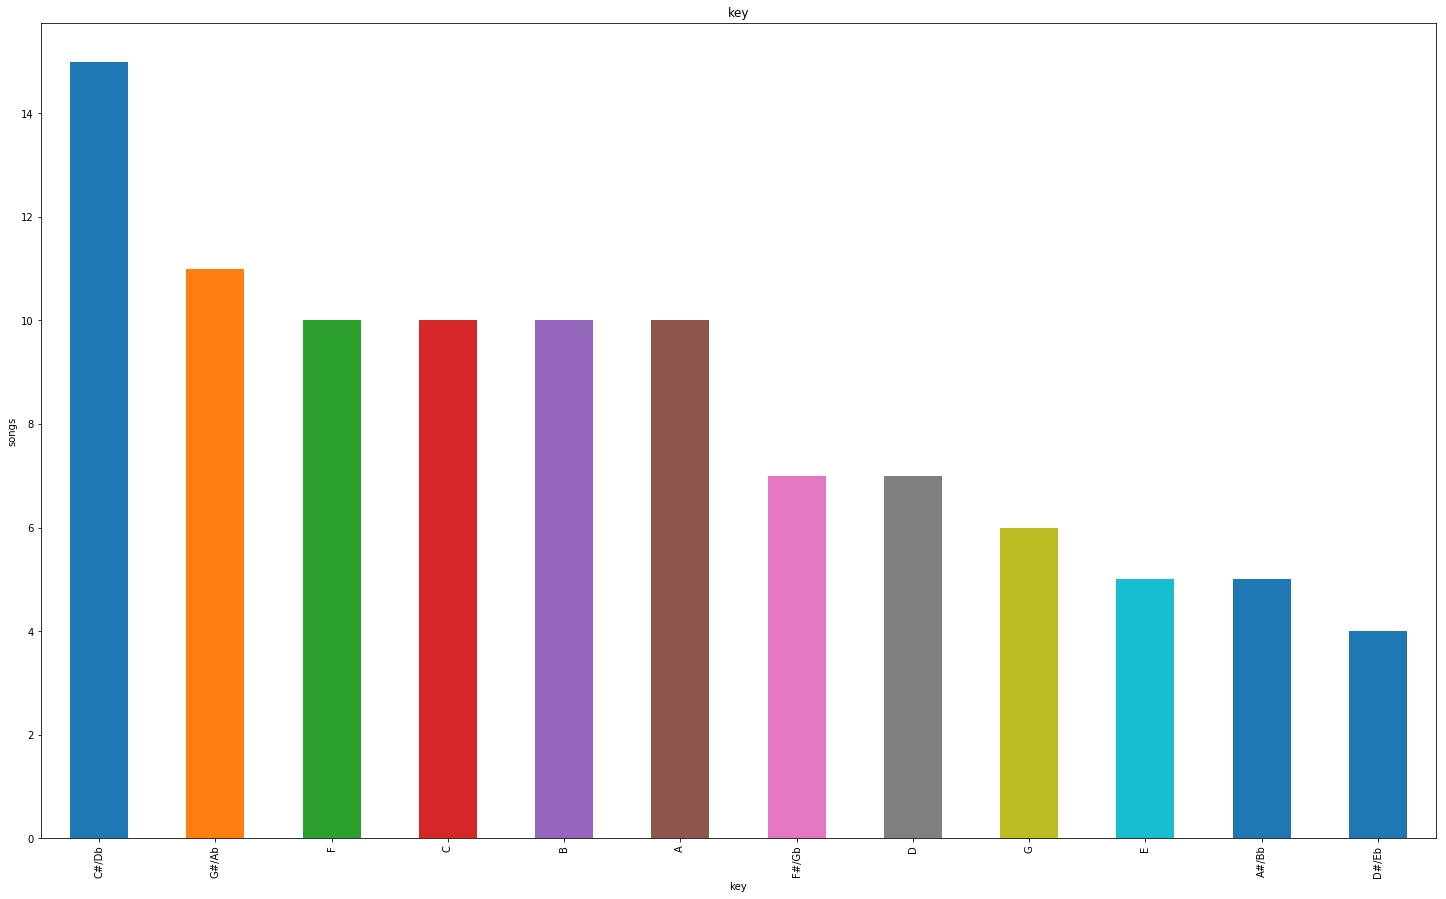

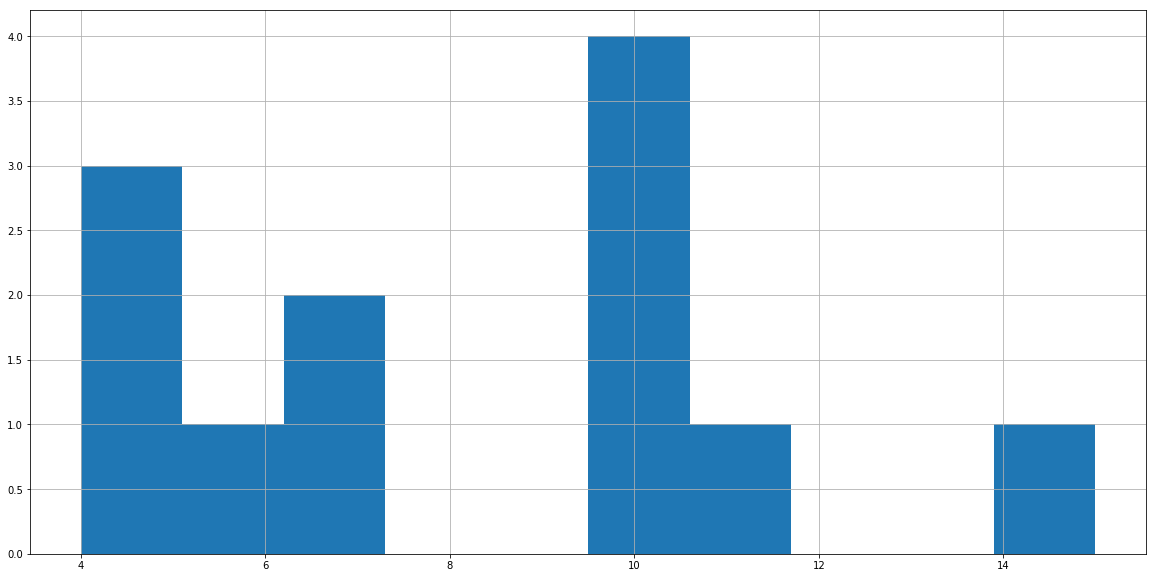

key
C#/Db    15
G#/Ab    11
F        10
C        10
B        10
A        10
F#/Gb     7
D         7
G         6
E         5
A#/Bb     5
D#/Eb     4
Name: name, dtype: int64

In [11]:
analysis('key')

In [14]:
duration = df['duration_ms'] / 1000
df['duration_min'] = round(duration/60, 2) 
stats('duration_min')


duration_min
count    100.000000
mean       3.420100
std        0.666863
min        1.590000
25%        3.080000
50%        3.420000
75%        3.690000
max        6.970000
Name: duration_min, dtype: float64

max:                name     artists
21  Te Bot? - Remix  Nio Garcia

min:                                   name       artists
94  Everybody Dies In Their Nightmares  XXXTENTACION


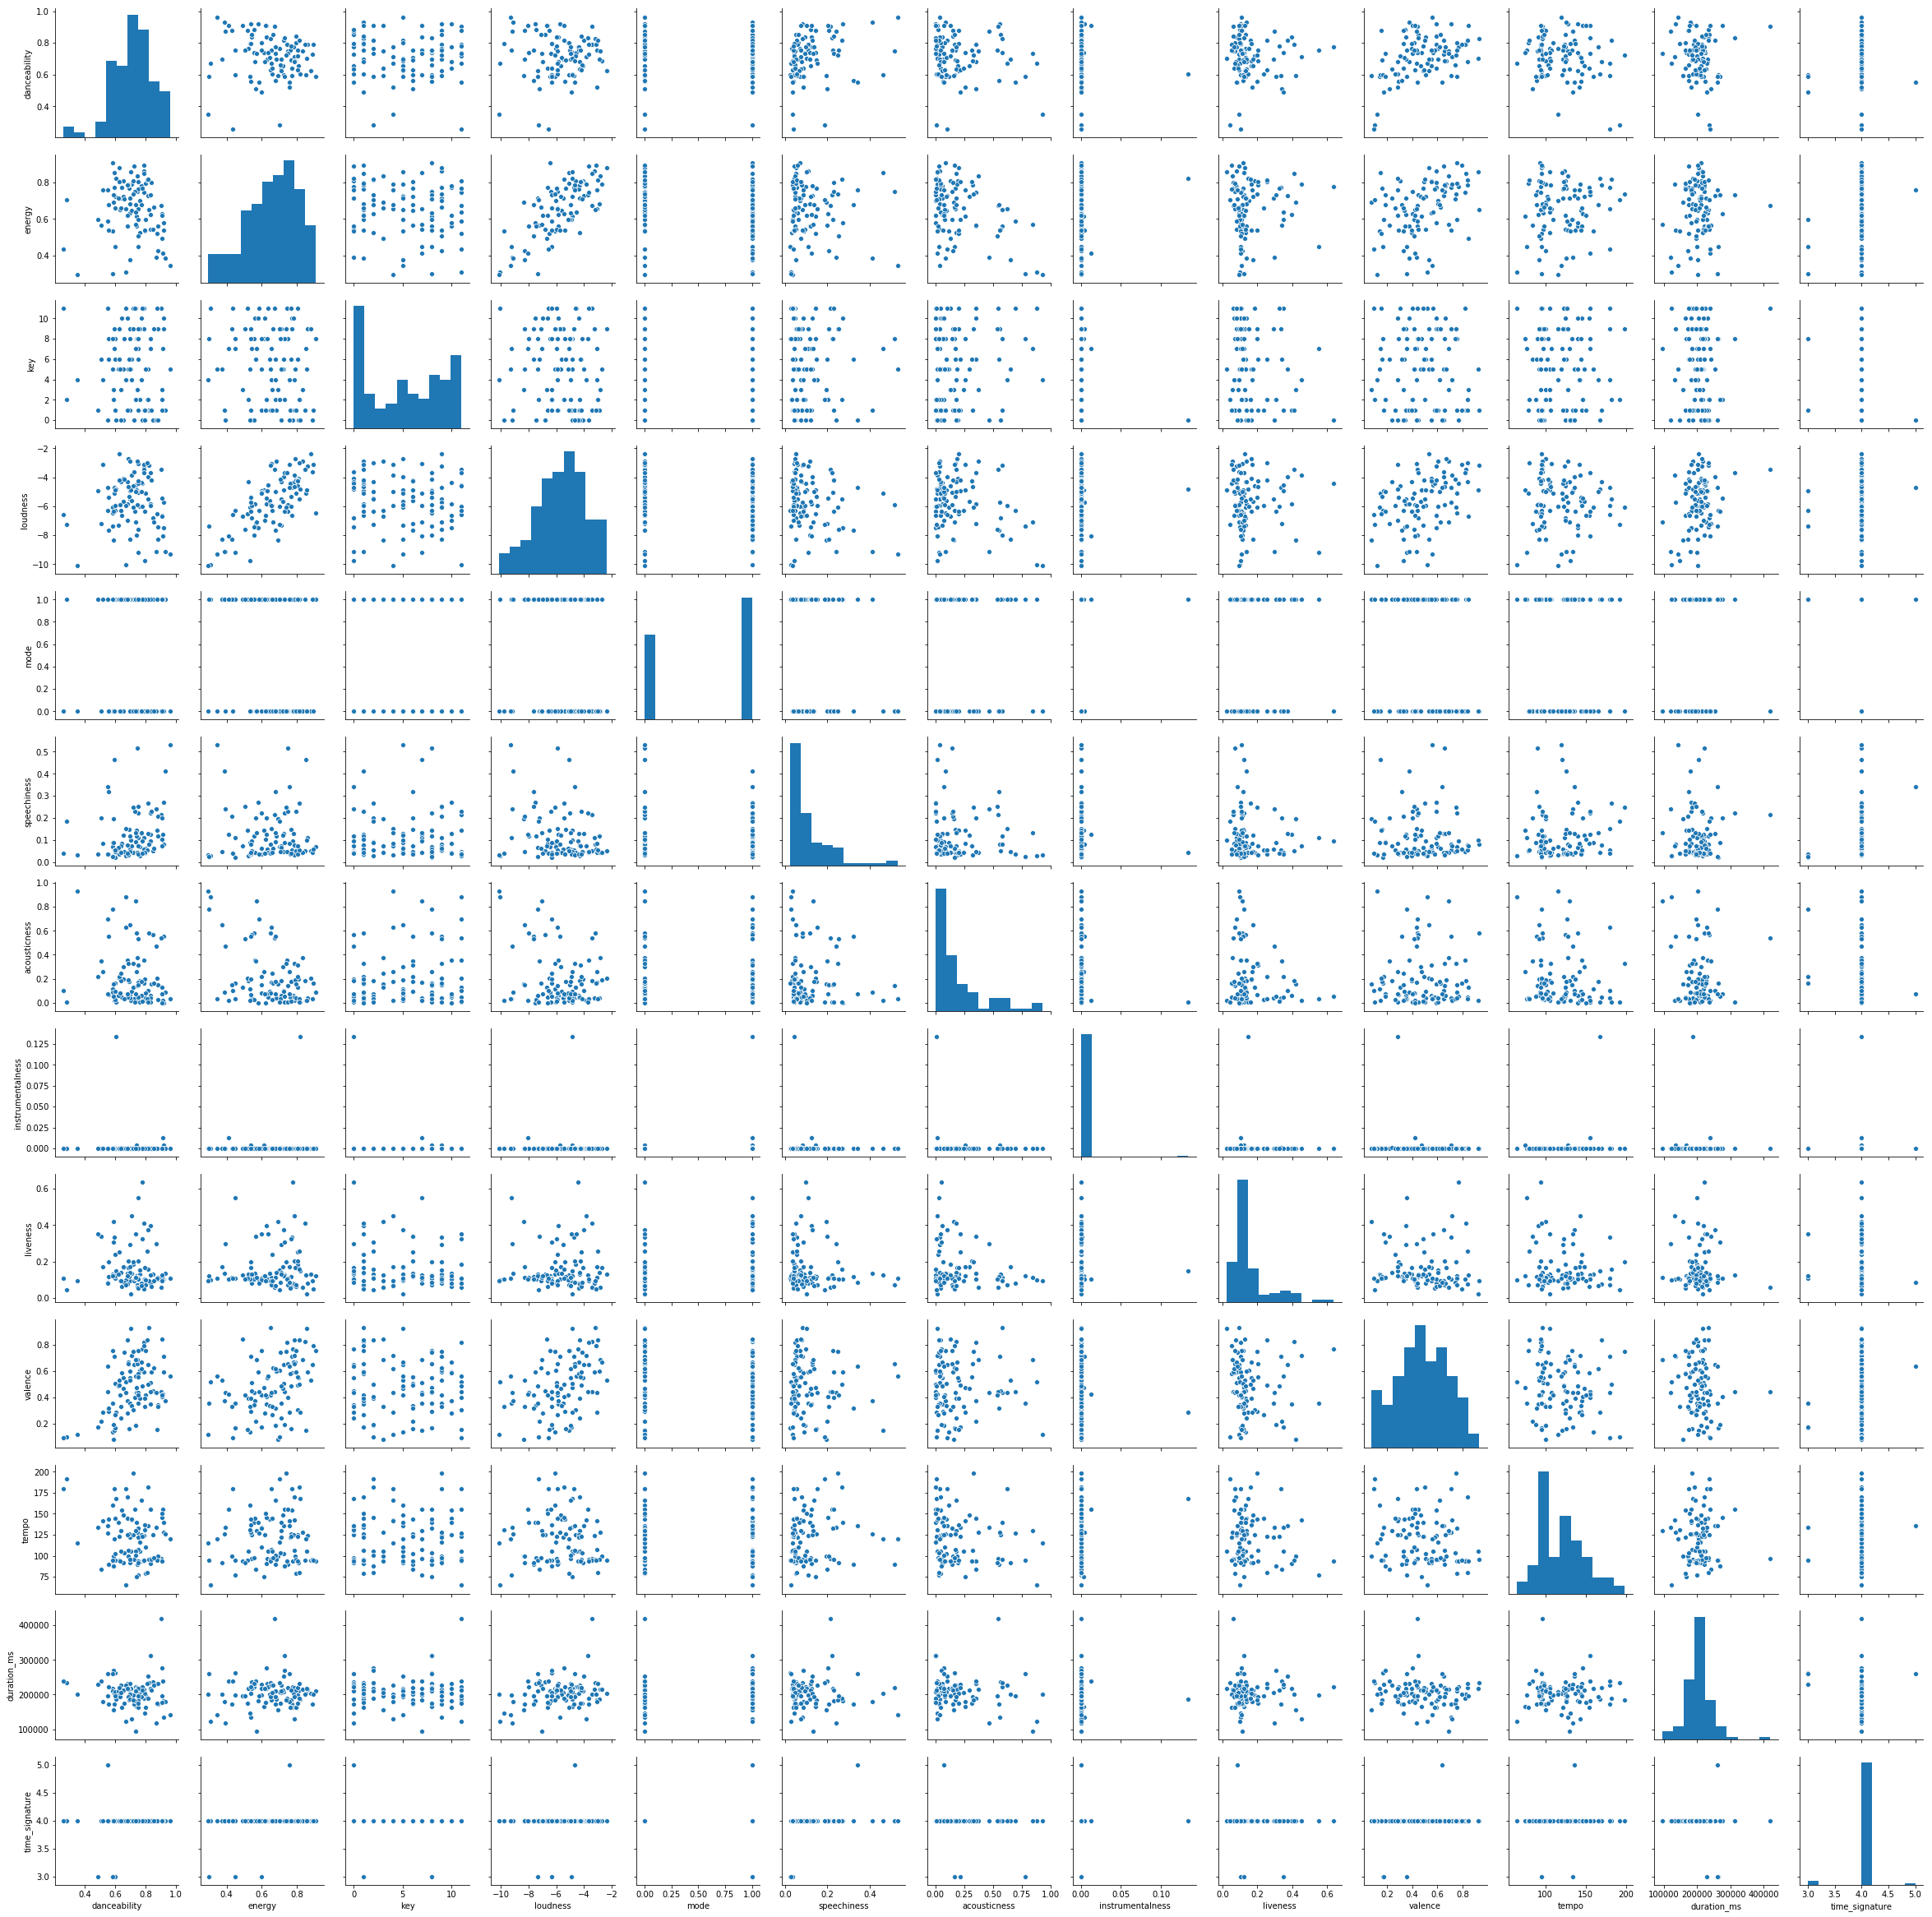

In [10]:
sns.pairplot(df)

# Question 1: 
What artists have the most songs in Spoitfy's top 100 played list?

**Answer:** XXXTENTACION and Post Malone each have 6 songs in the top 100 which is the most. Next is Drake with 4, Ed Sheeran and Marshmello at 3. 13 Artists have 2 and the rest have 1

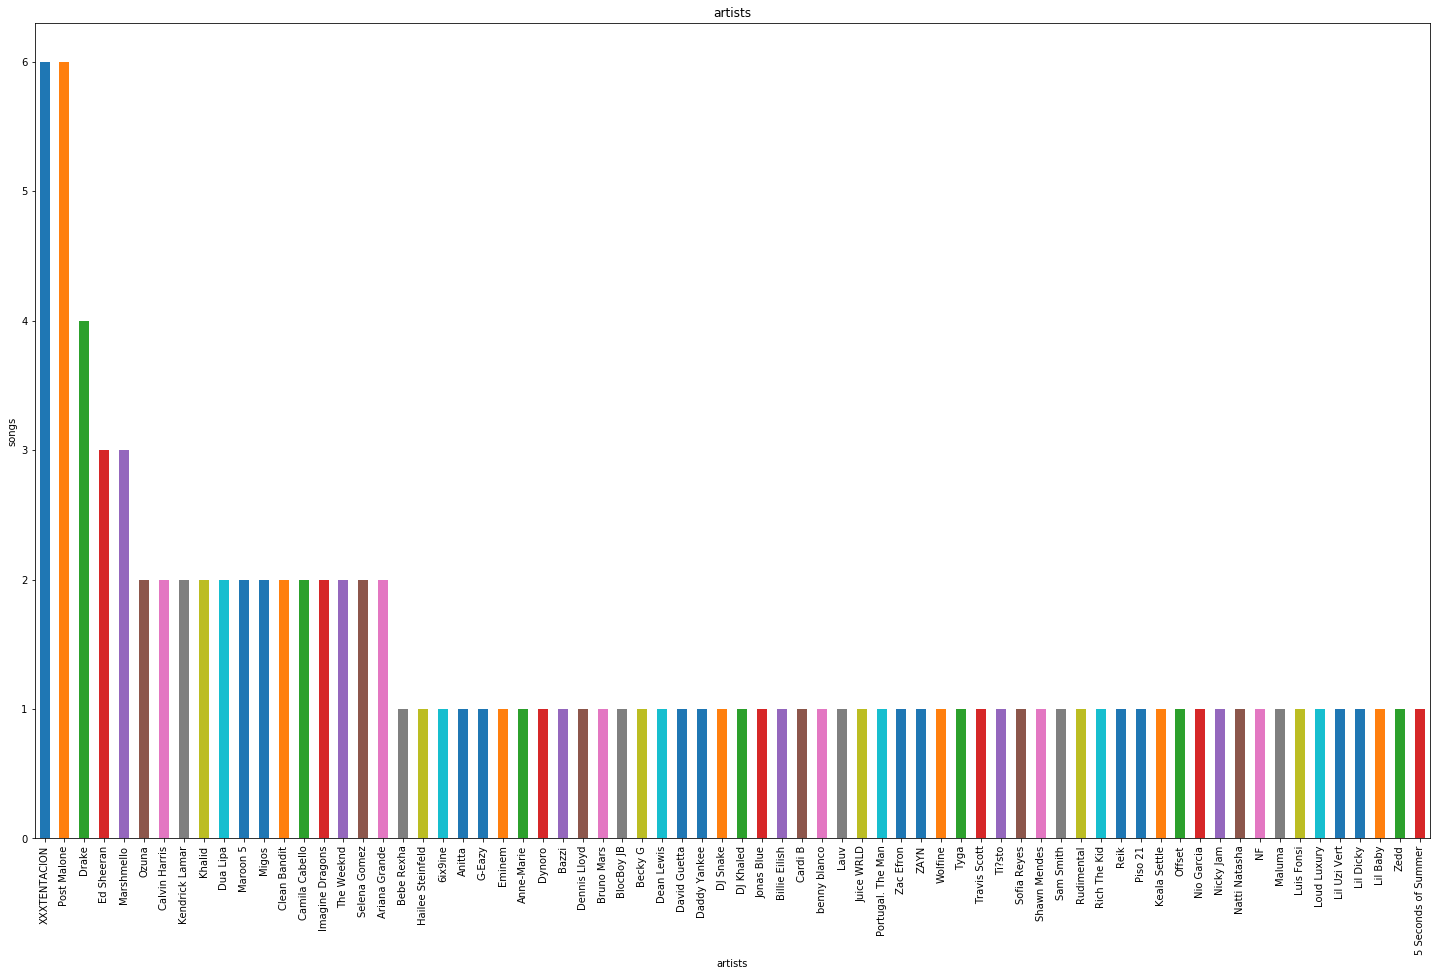

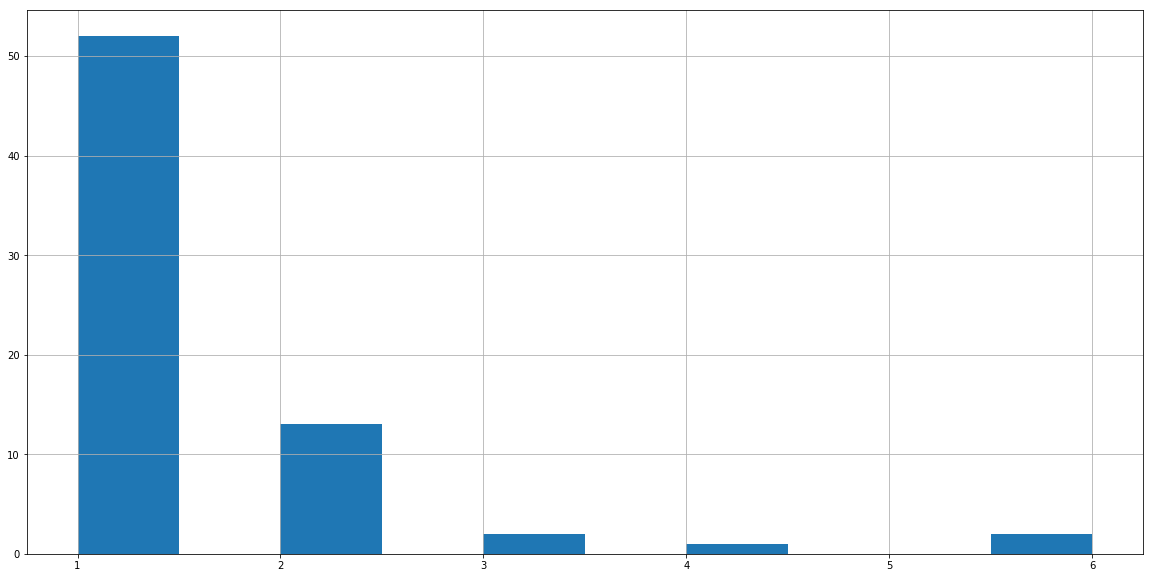

artists
XXXTENTACION        6
Post Malone         6
Drake               4
Ed Sheeran          3
Marshmello          3
Ozuna               2
Calvin Harris       2
Kendrick Lamar      2
Khalid              2
Dua Lipa            2
Maroon 5            2
Migos               2
Clean Bandit        2
Camila Cabello      2
Imagine Dragons     2
The Weeknd          2
Selena Gomez        2
Ariana Grande       2
Bebe Rexha          1
Hailee Steinfeld    1
Name: name, dtype: int64

In [11]:
analysis('artists')

# Question 2: 
What songs have the highest and lowest rating by audio feature?


In [15]:
my_array = np.array([['Yes Indeed-Lil Baby', 'Nice For What-Drake', 'FRIENDS-Marshmello',
                     'Yes Indeed-Lil Baby', 'lovely-(with Khalid)  Billie Eilish',
                     'Thunder-Imagine Dragons', 'Me Niego-Reik', 'Shape of You-Ed Sheeran',
                     'Coraz?n-(feat. Nego do Borel) Maluma', 'Te Bot? (Remix)-Nio Garcia'],
                     ['0.96400','0.909000', '-2.384000', '0.530000', '0.934000', '0.134000', '0.636000',
                     '0.931000', '198.075000', '6.97'],
                     ['Dusk Till Dawn (Radio Edit)-ZAYN', 'Lovely (feat. Khalid)-Billie Eilish',
                     'Lovely (feat. Khalid)-Billie Eilish', 'Perfect-Ed Sheeran', 'HUMBLE.-Kendrick Lamar', 
                     'multi', 'Finesse (Remix) [feat. Cardi B]  Bruno Mars', 'Nevermind-Dennis Lloyd',
                     'changes-XXXTENTACION', 'Te Bot? - Remix  Nio Garcia'],
                    ['0.25800', '0.296000', '-10.109000', '0.023200', '0.000282', '0.000000', '0.021500',
                     '0.079600', '0.079600', '1.59']])


ratings = pd.DataFrame(my_array)
ratings.columns = ['danceability', 'energy', 'loudness',
                 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo', 'duration_min']
ratings.index = ['song and artists', 'max score', 'song and artists', 'min score']




**Answer:** Below we can each audio feature with the corresponding song, artist, and value for the max and min values. 

In [16]:
ratings

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
song and artists,Yes Indeed-Lil Baby,Nice For What-Drake,FRIENDS-Marshmello,Yes Indeed-Lil Baby,lovely-(with Khalid) Billie Eilish,Thunder-Imagine Dragons,Me Niego-Reik,Shape of You-Ed Sheeran,Coraz?n-(feat. Nego do Borel) Maluma,Te Bot? (Remix)-Nio Garcia
max score,0.96400,0.909000,-2.384000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,6.97
song and artists,Dusk Till Dawn (Radio Edit)-ZAYN,Lovely (feat. Khalid)-Billie Eilish,Lovely (feat. Khalid)-Billie Eilish,Perfect-Ed Sheeran,HUMBLE.-Kendrick Lamar,multi,Finesse (Remix) [feat. Cardi B] Bruno Mars,Nevermind-Dennis Lloyd,changes-XXXTENTACION,Te Bot? - Remix Nio Garcia
min score,0.25800,0.296000,-10.109000,0.023200,0.000282,0.000000,0.021500,0.079600,0.079600,1.59


In [25]:
df.columns


Index(['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

# Question 3: 
Are there any audio features that seem to represent a strong linear or non-linear relationship with each other and if so what are they? 

**Answer:** There were not many scatter plots that suggested a strong, positive or negative, linear relationship. The Danceability and Valance shows what looks like a non-linear relationship, but a positive medium strength one. Loundness and Energy seems to have the strongest linear, positive relationship out of the data. There are however many cases of clustering. 

In [ ]:
df = df.columns.drop(['name', 'artists', 'key', 'mode', 'time_signature'])


Text(0.5,0,'loudness')

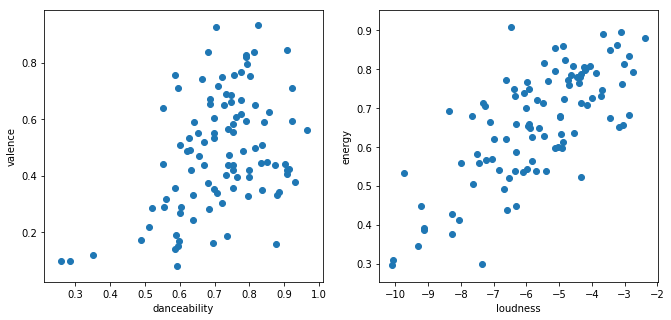

In [14]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.scatter(df['danceability'], df['valence'])
plt.ylabel('valence')
plt.xlabel('danceability')
plt.subplot(1,2,2)
plt.scatter(df['loudness'], df['energy'])
plt.ylabel('energy')
plt.xlabel('loudness')


# Further Research

This dataset is also comparatively small to the entire Spotify library, so more could be done with a larger dataset for larger trends and larger comparisons. An addition of a genre column could also provide further interesting insights. Something which could be interesting wold also involve looking into other years to see how the top played artists, genres, and audio features change over time. 

